<a href="https://colab.research.google.com/github/Arsham-Vosoughinia/Facial-Expression-Recognition-with-Deep-LearningFacial-Expression-Recognition-with-Deep-Learning/blob/main/cap_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project description: Facial expressions are a key factor in analyzing a person’s mood and behavior. Correctly predicting one’s mood reveals valuable information predicting the attitude or base-line behavior of that person. This project aims to create a model to effectively identify human emotions based on facial expressions. Portrait face images are used to create this model and assess accuracy.

In [ ]:
# important nessecarry libraries

import numpy as np
import pandas as pd 



import cv2
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf 
from keras.utils import np_utils
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Dense, Conv2D, UpSampling2D, MaxPooling2D, ZeroPadding2D, Reshape
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

the  dataset that I have downloaded contains pixel values of images as well as their emotion score. The dataset is saved in the format of *.csv and it is called FER2013.
https://arxiv.org/abs/2105.03588


In [ ]:
df = pd.read_csv("/content/fer2013.csv", error_bad_lines=False) # loading the downoaded dataset

In [ ]:
df.loc[[2,3,5,10,35000,35600]]

,emotion,pixels,Usage
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
10,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,Training
35000,0,238 239 239 240 240 238 245 227 111 73 72 59 6...,PrivateTest
35600,4,91 102 68 31 36 28 24 20 7 2 1 7 16 15 21 22 1...,PrivateTest


In [ ]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
vc=df['emotion'].value_counts()
vc=pd.DataFrame(vc)

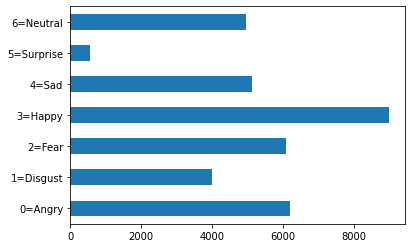

In [ ]:
import matplotlib.pyplot as plt

ax=df.emotion.value_counts().sort_index(ascending=False).plot(kind='barh')
ax.set_yticklabels(('0=Angry', '1=Disgust', '2=Fear', '3=Happy', '4=Sad', '5=Surprise', '6=Neutral'))
plt.show()


In [ ]:
df.shape

(35887, 3)

### Pre-processing data

In [ ]:
train = df[(df.Usage == 'Training')]      # deviding train and test test
test = df[(df.Usage !='Training')] 

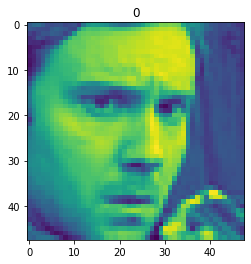

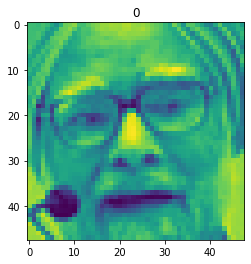

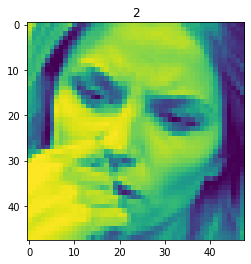

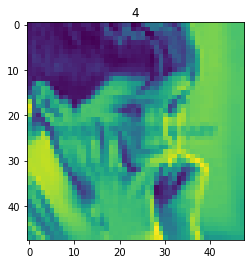

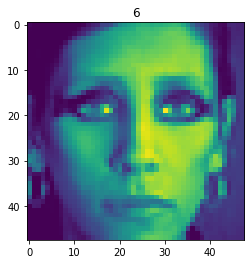

In [ ]:
trainSmp = np.array(list(map(str.split, train.pixels)), np.float32) # creating a copy variable to generate few images for visualization
trainSmp = trainSmp.reshape(28709,48,48)
for i in range(0,5):
  plt.figure()
  plt.imshow(trainSmp[i])
  plt.title(df.emotion[i])
  plt.show()


In [ ]:
Xtrain = np.array(list(map(str.split, train.pixels)), np.float32)  # preprocessing data- converting to float 
Xtest = np.array(list(map(str.split, test.pixels)), np.float32)
Xtrain = Xtrain.reshape(28709,48,48)  # reshaping images to a proper shape 48x48
Xtest = Xtest.reshape(7178,48,48)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')
Xtrain /= 255    # dividing by max pixel value to have all data between 0 to 1
Xtest /= 255

In [ ]:
ytrain = train.emotion  # creating the target variable
ytest = test.emotion 
ytrain = np_utils.to_categorical(ytrain, 7)
ytest = np_utils.to_categorical(ytest, 7)

# 1- setting up an initial deep learning model to be passed with above data and evaluating its performance

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.2
    Uninstalling importlib-metadata-4.8.2:
      Successfully uninstalled importlib-metadata-4.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [ ]:
from scikeras.wrappers import KerasClassifier


In [ ]:
X2train = Xtrain.reshape(28709,2304)  # reshaping train set again to be used in this model
X2test = Xtest.reshape(7178,2304)

In [ ]:
# creating a function that creates the model (required for KerasClassifier) 
# taking the hyperparameters we want to tune 
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=2304)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dropout(0.4))
    model.add(Dense(7, kernel_initializer=init_mode, activation=tf.nn.sigmoid))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse' ])
    return model

In [ ]:
modelDesc= create_model(init_mode='uniform') # stroing models 

In [ ]:
modelDesc.summary() # models summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                147520    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 152,135
Trainable params: 152,135
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau
import dill as pickle
# setting up call back param details
calbck = ReduceLROnPlateau(monitor=['val_acc'], factor=0.1, epsilon=0.001, patience=1, verbose=1)

In [ ]:
# using grid search to identify best parameters
%%time 
# defining grid search params

callbacks=calbck,
seed = 7
np.random.seed(seed)
batch_size = 128
epochs = 50

scorer=['neg_log_loss','accuracy','roc_auc']
init_mode = ['uniform']
model_CV = KerasClassifier(build_fn=create_model, init_mode='uniform', epochs=epochs, 
                           batch_size=batch_size, verbose=1)


param_grid = dict(init_mode=init_mode,)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid,scoring=scorer ,refit=False, n_jobs=-1, cv=3)
grid_result = grid.fit(X2train, ytrain)

CPU times: user 353 ms, sys: 267 ms, total: 620 ms
Wall time: 47.7 s


In [ ]:

mtnll = grid_result.cv_results_['mean_test_neg_log_loss']
acc=grid_result.cv_results_['mean_test_accuracy']
mtraoc = grid_result.cv_results_['mean_test_roc_auc']

print('Mean accuracy score is:',round(acc[0],2))
print('Mean loss score is:',round(mtnll[0],2))
print('Mean  roc-auc score is:',round(mtraoc[0],2))

Mean accuracy score is: 0.38
Mean loss score is: -1.58
Mean  roc-auc score is: 0.71


# implimenting  transfer learning to tune above the model aiming to achieve a better accuracy score for the model

In [ ]:
from tensorflow.keras.layers import Input
from keras.applications.vgg16 import VGG16, preprocess_input



In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten


In [ ]:
model = Sequential()   # setting up transfer learning model
model.add(Conv2D(input_shape=(48,48,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())  # adding the previous initial model to transfer learning model
model.add(Dense(64,  activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7,  activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import Adam
optim = Adam(learning_rate=0.0005)  # defining optimizer type and learning rate
model.compile(optimizer=optim, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 conv2d_14 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                  

In [ ]:
from keras.callbacks import ReduceLROnPlateau  
# defining callbacks
cb = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1,
                             save_best_only=True,save_weights_only=False, 
                             mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, 
                      mode='auto')
hist = model.fit(steps_per_epoch=225, x=Xtrain, y = ytrain, validation_steps=10,batch_size=128,
                 epochs=50,callbacks=cb)

Epoch 1/50
225/225 [==============================] - 13s 56ms/step - loss: 0.6831 - accuracy: 0.7697 - lr: 5.0000e-04
Epoch 2/50
225/225 [==============================] - 12s 55ms/step - loss: 0.5426 - accuracy: 0.8169 - lr: 5.0000e-04
Epoch 3/50
225/225 [==============================] - 12s 55ms/step - loss: 0.4900 - accuracy: 0.8344 - lr: 5.0000e-04
Epoch 4/50
225/225 [==============================] - 12s 55ms/step - loss: 0.4411 - accuracy: 0.8549 - lr: 5.0000e-04
Epoch 5/50
225/225 [==============================] - 12s 55ms/step - loss: 0.3790 - accuracy: 0.8752 - lr: 5.0000e-04
Epoch 6/50
225/225 [==============================] - 12s 55ms/step - loss: 0.3360 - accuracy: 0.8902 - lr: 5.0000e-04
Epoch 7/50
225/225 [==============================] - 12s 55ms/step - loss: 0.3013 - accuracy: 0.9029 - lr: 5.0000e-04
Epoch 8/50
225/225 [==============================] - 12s 55ms/step - loss: 0.2662 - accuracy: 0.9168 - lr: 5.0000e-04
Epoch 9/50
225/225 [============================

In [ ]:
test_loss, test_acc = model.evaluate(Xtrain, ytrain) # displaying best accuracy score
print('\nTest accuracy:', round(test_acc,2))
print('\nTest loss:', round(test_loss,2))

898/898 [==============================] - 8s 9ms/step - loss: 0.0480 - accuracy: 0.9845

Test accuracy: 0.98

Test loss: 0.05


### Evaluating results on the test set

In [ ]:
test_loss, test_acc = model.evaluate(Xtest, ytest) # displaying best accuracy score
print('\nTest accuracy:', round(test_acc,2))
print('\nTest loss:', round(test_loss,2))

225/225 [==============================] - 2s 8ms/step - loss: 3.0361 - accuracy: 0.6042

Test accuracy: 0.6

Test loss: 3.04


In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
ypred=model.predict(Xtest, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


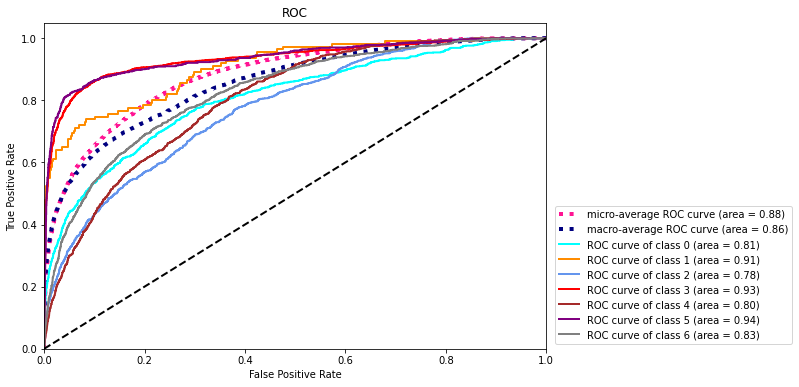

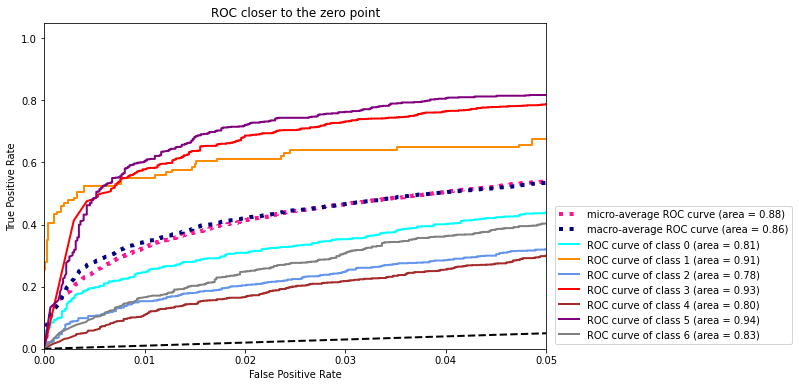

In [ ]:
from IPython.core.pylabtools import figsize
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

f = plt.figure(1)
f.set_figwidth(9)
f.set_figheight(6)
lw = 2

# calculate ROC-AUC for 7 classes
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], ypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# get micro-average ROC-AUC
fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), ypred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# get macro-average ROC-AUC

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# divide to average it 
mean_tpr /= 7

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','brown','purple','gray'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right",bbox_to_anchor=[1.5, 0.0])
plt.show()


f = plt.figure(2)
f.set_figwidth(9)
f.set_figheight(6)
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','brown','purple','gray'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 0.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC closer to the zero point')
plt.legend(loc="lower right", bbox_to_anchor=[1.5, 0.0] )
plt.show()